# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import seaborn as sns

supermarket_data = pd.read_csv('C:\pythondata\data\실습과제\data/supermarket.csv')

In [98]:
supermarket_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [99]:
supermarket_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [100]:
print(supermarket_data.info())
print(supermarket_data.index)
# null값이 없음을 확인한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [101]:
# gender와 Product line으로 성별별 관심물품을 확인한다.
# customer type과 product line으로 성별별 회원고객의 물품 선호도를 확인한다.
# branch와 Customer type로 각 지사별 회원 수를 확힌할 수 있다.
# branch와 gross income으로 지사별 이익을 확인한다.
# Branch와 payment로 Branch별로 어떤 결제방법을 많이 사용하였는지 확인하다.

# 위 정보들을 토대로 지사별로 프리미엄 회원 전략을 짜볼 수 있다.

Gender                  Female  Male
Product line                        
Electronic accessories     488   483
Fashion accessories        530   372
Food and beverages         514   438
Health and beauty          343   511
Home and lifestyle         498   413
Sports and travel          496   424


<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

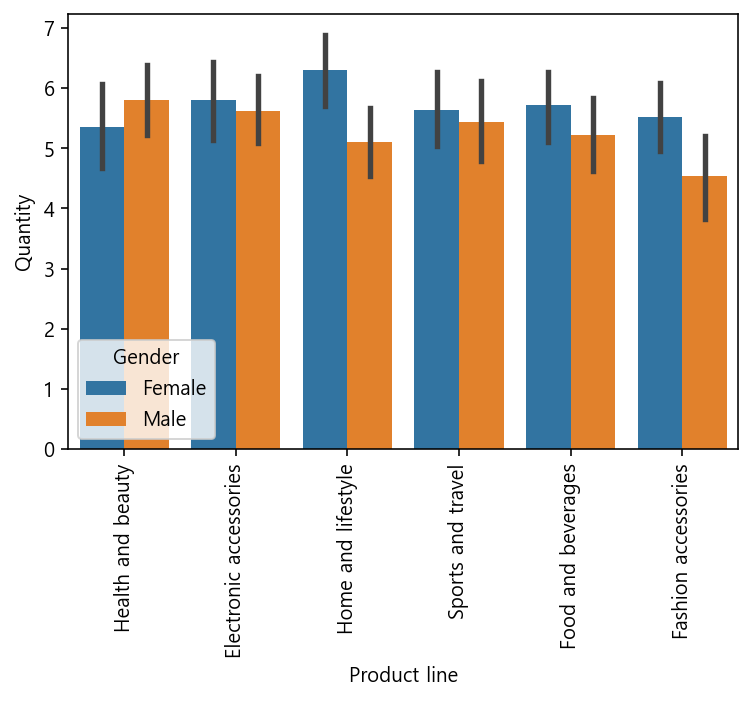

In [102]:
# 1.gender와 Product line으로 성별별 관심물품을 확인한다.
data_gen_product = pd.pivot_table(data = supermarket_data, index = 'Product line', columns = 'Gender', values = 'Quantity', aggfunc = 'sum')

print(data_gen_product)

graph_gen_product = sns.barplot(data = supermarket_data, x = 'Product line', y= 'Quantity', hue = 'Gender')
plt.xticks(rotation = 90)

graph_gen_product

In [103]:
# 남성은 Health and beautyfmf 가장 많이 샀고, Fashion accessories를 가장 적게 샀다.
# 여성은 Fashion accessories를 가장 많이 샀고, Health and beauty를 가장 적게 샀다.

Customer type           Member  Normal
Product line                          
Electronic accessories     429     542
Fashion accessories        439     463
Food and beverages         506     446
Health and beauty          428     426
Home and lifestyle         490     421
Sports and travel          493     427


<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

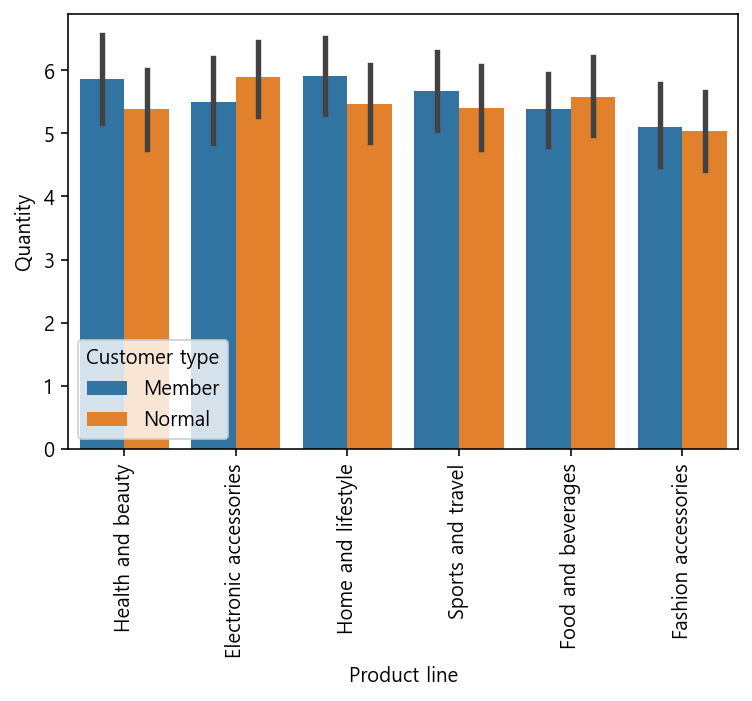

In [104]:
# 2.customer type과 product line으로 성별별 회원고객의 물품 선호도를 확인한다.

data_mem_product = pd.pivot_table(data = supermarket_data, index = 'Product line', columns = 'Customer type', values = 'Quantity', aggfunc = 'sum')

print(data_mem_product)

graph_Mem_product = sns.barplot(data = supermarket_data, x = 'Product line', y= 'Quantity', hue = 'Customer type')
plt.xticks(rotation = 90)

graph_Mem_product

In [105]:
# 비회원들은 Electronic accessories을 가장 많이 샀으며, Home and lifestyle을 가장 적게 샀다.
# 회원들은 Food and beverages을 가장 많이 샀으며, Health and beauty를 가장 적게 샀다.

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
3    123-19-1176      A     Yangon        Member    Male   
6    355-53-5943      A     Yangon        Member  Female   
8    665-32-9167      A     Yangon        Member  Female   
9    692-92-5582      B   Mandalay        Member  Female   
..           ...    ...        ...           ...     ...   
988  267-62-7380      C  Naypyitaw        Member    Male   
989  430-53-4718      B   Mandalay        Member    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
997  727-02-1313      A     Yangon        Member    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
3         Health and beauty       58.22         8  23.2880  489.0480   
6    Electronic accessories       68.84         6  20.6520  433

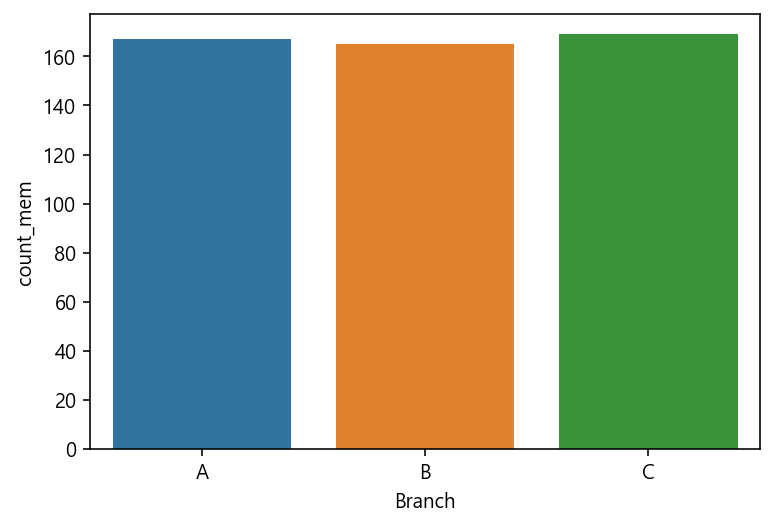

In [106]:
# 3.branch와 Customer type로 각 지사별 회원 수를 확힌할 수 있다.
mem = supermarket_data[supermarket_data['Customer type'] == 'Member']
print(mem)

data_bran_mem = mem.groupby('Branch', as_index = False).agg(count_mem = ('Customer type', 'count'))
print(data_bran_mem)

graph_bran_mem = sns.barplot(data = data_bran_mem, x = 'Branch', y = 'count_mem')

In [ ]:
# 회원수가 평균 167명 정도로 비슷하다.

  Branch  bran_incom
0      A   5057.1605
1      B   5057.0320
2      C   5265.1765


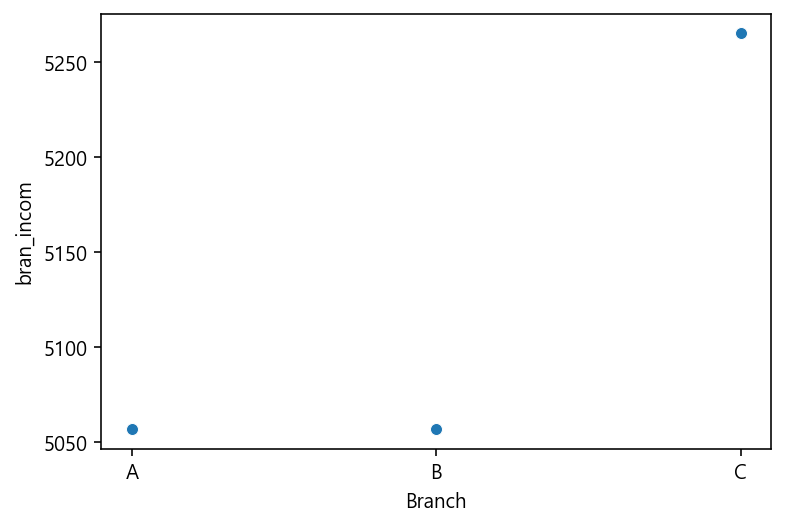

In [107]:
# 4.branch와 gross income으로 지사별 이익을 확인한다.
data_bran_incom = supermarket_data.groupby('Branch', as_index = False).agg(bran_incom = ('gross income', 'sum'))

print(data_bran_incom)

graph_bran_incom = sns.scatterplot(data = data_bran_incom, x = 'Branch', y ='bran_incom')

In [108]:
# A와B 지사는 이익금이 비슷하며 C가 가장 높다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 996
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               345 non-null    object        
 1   Branch                   345 non-null    object        
 2   City                     345 non-null    object        
 3   Customer type            345 non-null    object        
 4   Gender                   345 non-null    object        
 5   Product line             345 non-null    object        
 6   Unit price               345 non-null    float64       
 7   Quantity                 345 non-null    int64         
 8   Tax 5%                   345 non-null    float64       
 9   Total                    345 non-null    float64       
 10  Date                     345 non-null    object        
 11  Time                     345 non-null    object        
 12  Payment                  345 non-nul

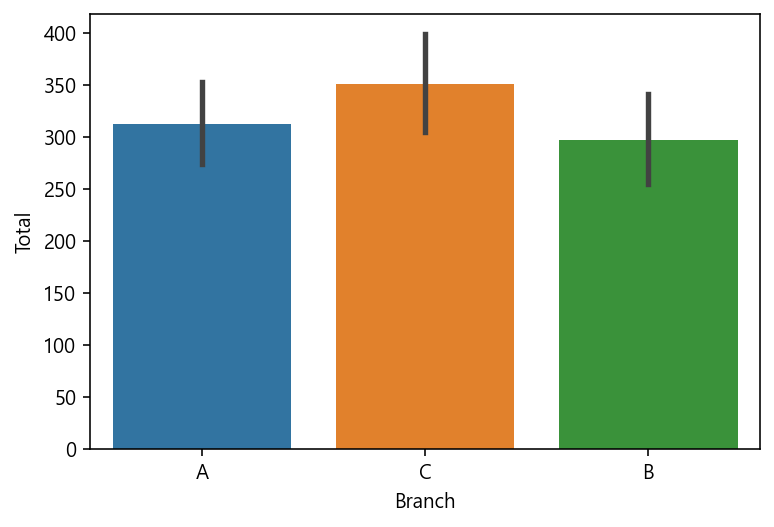

In [141]:
# 5.Branch와 payment로 Branch별로 어떤 결제방법을 많이 사용하였는지 확인하다.

Ewallet = supermarket_data[supermarket_data['Payment'] == 'Ewallet']
print(Ewallet.info(1))

graph_Ewallet = sns.barplot(data = Ewallet, x = 'Branch', y = 'Total')

In [ ]:
# Ewallet을 c지사에서 가장 많이 사용하였고 b지사에서는 가장 적게 사용되었다.
# B지사에서는 Ewallet 호환성을 재고해본다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 2 to 990
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               311 non-null    object        
 1   Branch                   311 non-null    object        
 2   City                     311 non-null    object        
 3   Customer type            311 non-null    object        
 4   Gender                   311 non-null    object        
 5   Product line             311 non-null    object        
 6   Unit price               311 non-null    float64       
 7   Quantity                 311 non-null    int64         
 8   Tax 5%                   311 non-null    float64       
 9   Total                    311 non-null    float64       
 10  Date                     311 non-null    object        
 11  Time                     311 non-null    object        
 12  Payment                  311 non-nul

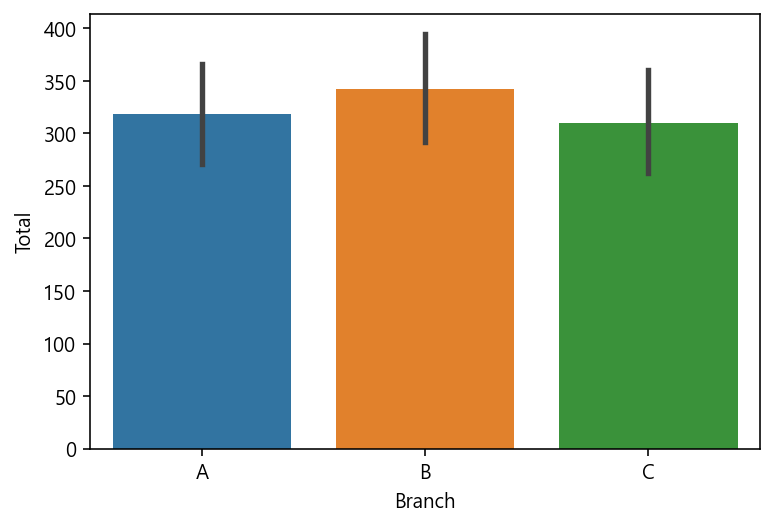

In [140]:
Credit_card = supermarket_data[supermarket_data['Payment'] == 'Credit card']
print(Credit_card.info(1))

graph_Credit_card = sns.barplot(data = Credit_card, x = 'Branch', y = 'Total')

In [ ]:
# credit card는 B지사에서 가장 많이 사용 되었고, A지사에서 가장 적게 사용되었다.
# B지사에서 특정 카드회사와 제휴계약을 맺을 수 있는지 재고해본다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               344 non-null    object        
 1   Branch                   344 non-null    object        
 2   City                     344 non-null    object        
 3   Customer type            344 non-null    object        
 4   Gender                   344 non-null    object        
 5   Product line             344 non-null    object        
 6   Unit price               344 non-null    float64       
 7   Quantity                 344 non-null    int64         
 8   Tax 5%                   344 non-null    float64       
 9   Total                    344 non-null    float64       
 10  Date                     344 non-null    object        
 11  Time                     344 non-null    object        
 12  Payment                  344 non-nul

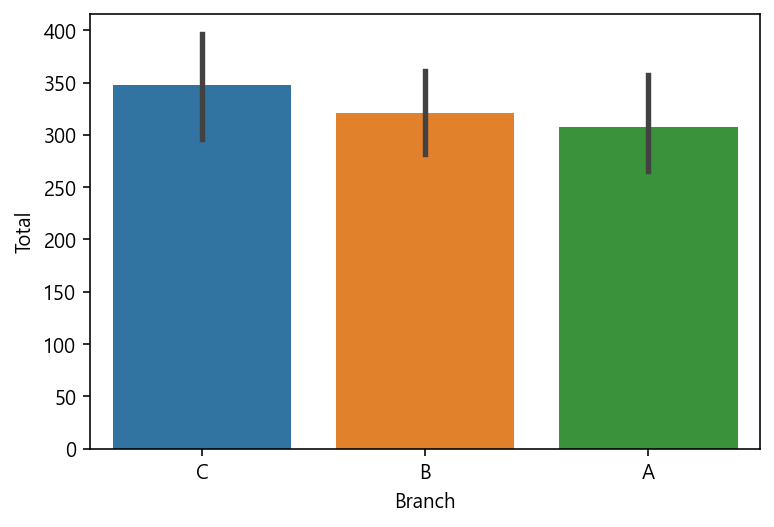

In [142]:
Cash = supermarket_data[supermarket_data['Payment'] == 'Cash']
print(Cash.info(1))

graph_Cash = sns.barplot(data = Cash, x = 'Branch', y = 'Total')


In [ ]:
# C지사에서 Cash를 가장 많이 사용하였고, A지사에서 가장 적게 사용되었다.
# C지사에서는 상품권을 현금으로 거래할 수 있는 시스템을 재고해본다.

In [ ]:
# 남성은 Health and beautyfmf 가장 많이 샀고, Fashion accessories를 가장 적게 샀다.
# 여성은 Fashion accessories를 가장 많이 샀고, Health and beauty를 가장 적게 샀다.

# 비회원들은 Electronic accessories을 가장 많이 샀으며, Home and lifestyle을 가장 적게 샀다.
# 회원들은 Food and beverages을 가장 많이 샀으며, Health and beauty를 가장 적게 샀다.

# 회원수가 평균 167명 정도로 비슷하다.

# 비회원들을 끌어들이기 위해서 Electronic accessories의 회원구매 시 혜택을 재고한다,
# 여성회원들에게 Health and beauty 구매 시 혜택을 재고한다.
# Home and lifestyle의 비중을 줄인다.

# A와B 지사는 이익금이 비슷하며 C가 가장 높다.

# Ewallet을 c지사에서 가장 많이 사용하였고 b지사에서는 가장 적게 사용되었다.
# B지사에서는 Ewallet 호환성을 재고해본다.

# credit card는 B지사에서 가장 많이 사용 되었고, A지사에서 가장 적게 사용되었다.
# B지사에서 특정 카드회사와 제휴계약을 맺을 수 있는지 재고해본다.

# C지사에서 Cash를 가장 많이 사용하였고, A지사에서 가장 적게 사용되었다.
# C지사에서는 상품권을 현금으로 거래할 수 있는 시스템을 재고해본다.